C:\Users\jemsc\AppData\Local\Temp\ipykernel_17972\615028203.py:51: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()  # Updated line



Iris Dataset Results:
Classical SVM - Accuracy: 1.0000, Time: 0.0020 seconds
Classical KNN - Accuracy: 1.0000, Time: 0.0044 seconds
Quantum VQC - Accuracy: 0.3778, Time: 40.4655 seconds


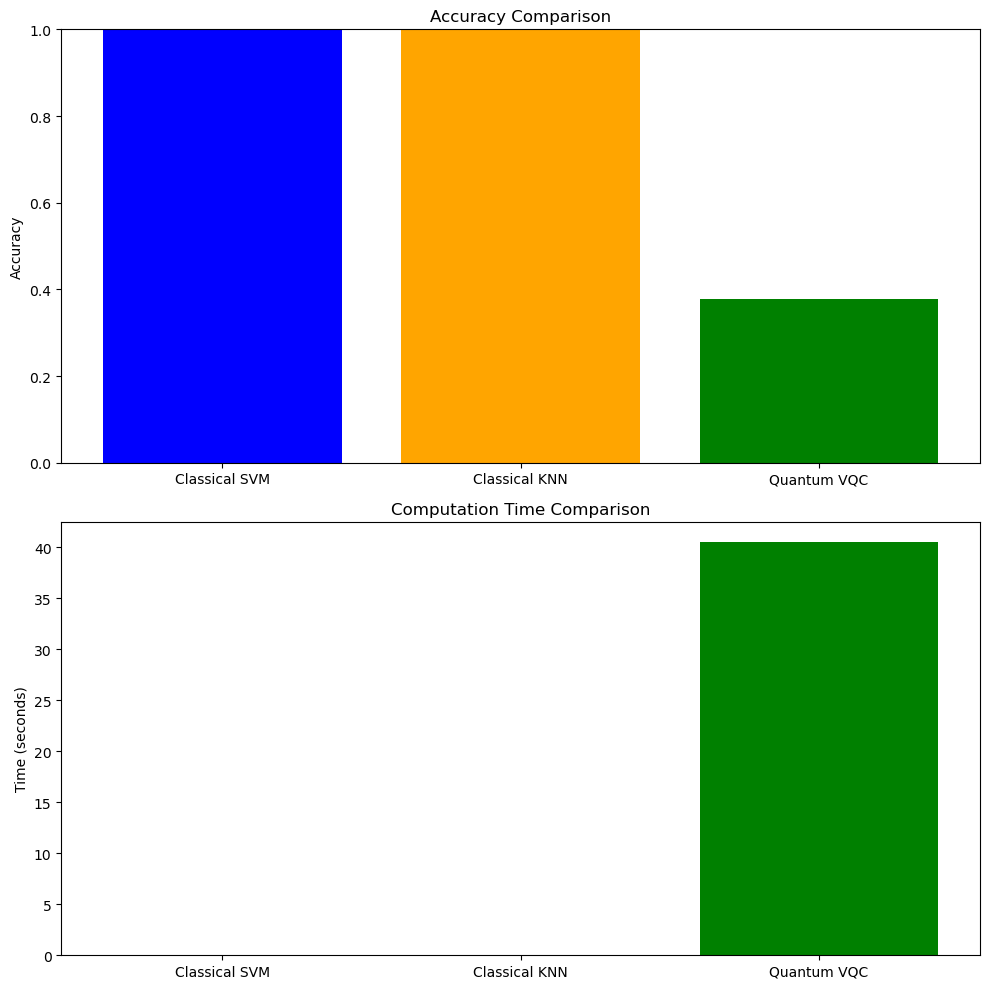

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from tqdm import tqdm

def run_experiment(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardizing the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    results = {}

    # Classical SVM
    start_time_svm = time.time()
    svm_classifier = SVC(kernel='rbf')
    svm_classifier.fit(X_train, y_train)
    y_pred_svm = svm_classifier.predict(X_test)
    results['svm_accuracy'] = accuracy_score(y_test, y_pred_svm)
    results['svm_time'] = time.time() - start_time_svm

    # Classical KNN
    start_time_knn = time.time()
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    results['knn_accuracy'] = accuracy_score(y_test, y_pred_knn)
    results['knn_time'] = time.time() - start_time_knn

    # Quantum VQC
    feature_map = ZZFeatureMap(feature_dimension=4, reps=2)
    ansatz = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks='cz', reps=2)
    optimizer = COBYLA(maxiter=100)

    # Create a sampler
    sampler = Sampler()  # Updated line

    start_time_vqc = time.time()
    vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, sampler=sampler)
    vqc.fit(X_train, y_train)
    results['vqc_accuracy'] = vqc.score(X_test, y_test)
    results['vqc_time'] = time.time() - start_time_vqc

    return results

# Load Iris dataset
iris = datasets.load_iris()
results = run_experiment(iris.data, iris.target)

# Print results
print(f"\nIris Dataset Results:")
print(f"Classical SVM - Accuracy: {results['svm_accuracy']:.4f}, Time: {results['svm_time']:.4f} seconds")
print(f"Classical KNN - Accuracy: {results['knn_accuracy']:.4f}, Time: {results['knn_time']:.4f} seconds")
print(f"Quantum VQC - Accuracy: {results['vqc_accuracy']:.4f}, Time: {results['vqc_time']:.4f} seconds")

# Visualize results
algorithms = ['Classical SVM', 'Classical KNN', 'Quantum VQC']
accuracies = [results['svm_accuracy'], results['knn_accuracy'], results['vqc_accuracy']]
times = [results['svm_time'], results['knn_time'], results['vqc_time']]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Accuracy comparison
ax1.bar(algorithms, accuracies, color=['blue', 'orange', 'green'])
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Comparison')
ax1.set_ylim([0, 1])  # Set y-axis limit from 0 to 1

# Time comparison
ax2.bar(algorithms, times, color=['blue', 'orange', 'green'])
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Computation Time Comparison')

plt.tight_layout()
plt.show()
